<H1>1. Introduction</H1>
RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. 

<H3>1.1 About the Data Set</H3>
Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The data was extracted from Kaggle website https://www.kaggle.com/c/titanic/data

<H1>2. Data Analysis</H2>
<H3>2.1.1 Hypothesis</H3>
I want to validate that the concept of “Women and Children First!” holds true and to determine if their survival would be further increased by one or more of the following data points: Fare price, Embarkment and Passenger Class. 

<H3>2.1.2 Hypotheses Testing Approach </H3>

My hypothesis will be validated, by answering the below questions, through use of data visualisations to identify correlations between the data points. Some visualisations will be looking at the same data points with the purpose of further validating the findings and finding additional details that will aid in narrowing down the specific details of what is needed to maximise ones chances of surviving the titanic. 

<ul>
<li>Do women have a greater chance of surviving than men?</li>

<li>Does being a child (ie under 15 years of age) increase your chance of surviving?</li>

<li>Does being in a higher passenger class increase your chance of surviving?</li>

<li>Does the place of embarkment increase ones chance of surviving?</li>
</ul>

<h3>2.2 Investigate and Prepare Data</h3>

<h4>2.2.1 Import Data Set and Check contents in a Data Frame</h4>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic_data.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<H4>2.2.2 Identify Data Types, Missing Values and Duplicate Values</H4>

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#Check that there are no duplicates of passenger
print 'Number of Unique Passengers in data set: '+ str(titanic_df.Name.nunique())

Number of Unique Passengers in data set: 891


<b>Interesting Findings:</b>
<p>
From the results of running titanic_df.info() below, it can be seen that the following columns are missing values:
<lu>
<li>Age - 20% is missing</li>
<li>Cabin - 77% is missing</li>
<li>Embarked - 0.3% is missing </li>
</p>
And from runnning str(titanic_df.Name.nunique()) all 891 passenger records are unique. So there are no duplicates. 
</lu>

<H4>2.2.2 Remove unwanted columns</H4>
<p>I have removed the following columns as they will not be used in this anlaysis:</p>
<li>Cabin</li>
<li>Ticket</li>
<li>SibSp</li>
<li>Parch</li>
<li>PassengerId</li>


In [6]:
titanic_df = titanic_df[['PassengerId','Name','Survived','Pclass','Sex','Age','Fare','Embarked']]

<b>2.2.3 Assign Reference Names to Code Values</b>

In [7]:
def embarkment_name(Embarked):
    if Embarked == 'S':
        return 'Southampton'
    if Embarked == 'C':
        return 'Cherbourg'
    if Embarked == 'Q':
        return 'Queenstown'
    
def age_group(Age):
    if Age < 15:
        return 'Child'
    elif Age > 60:
        return 'Senior'
    else:
        return 'Adult'
    
def Passenger_class(Pclass):
    if Pclass == 1:
        return 'First Class'
    elif Pclass == 2:
        return 'Second Class'
    else:
        return 'Third Class'

#Assign Reference Values to their own columns in the DataFrame
titanic_df['embarkment location'] = titanic_df['Embarked'].apply(embarkment_name)
titanic_df['Age Group'] = titanic_df['Age'].apply(age_group)
titanic_df['Passenger Class'] = titanic_df['Pclass'].apply(Passenger_class)

#validate new columns were added
#titanic_df.head()

<H4>2.2.4 Handling of missing values</h4>
<p>Of the columns missing data Age is what we what we care about missing as we want to use it for our analysis </p>

<b>Option 1:</b> 
<p>I could substitute all NA "Age" values with the median; which is safer to use than the mean as the mean can be skewed by large and small value outliers. However, by subsitituting empty age values with the median we will be artifically affecting the distribution (see the the before and after histogram below).</p>

<p><b>Option 2:</b> </p>
<p>Ignore  passengers that are missing an Age value.</p>

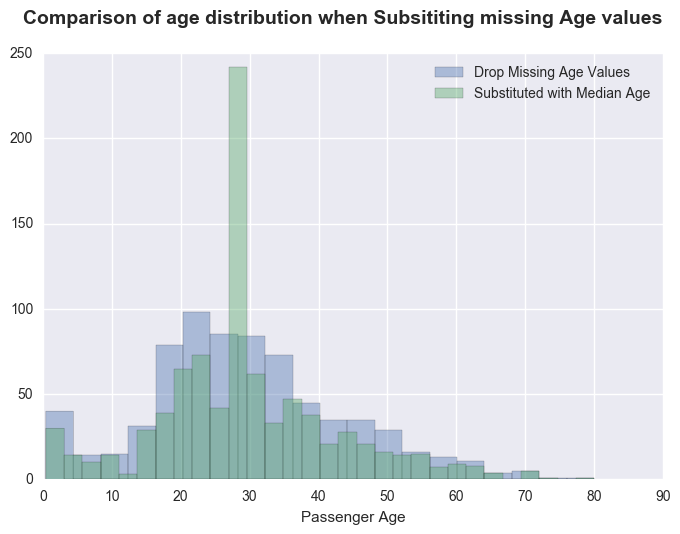

In [8]:
# Create a comparison plot to show the different output when using Option 1 and OPtion 2
plt.suptitle('Comparison of age distribution when Subsititing missing Age values', fontsize=14, fontweight='bold')


titanic_skew_df2 = pd.read_csv('titanic_data.csv')
sns.distplot(titanic_skew_df2.Age.dropna(), kde=False, label='Drop Missing Age Values')
sns.distplot(titanic_skew_df2['Age'].fillna(titanic_skew_df2['Age'].median()), kde=False, label='Substituted with Median Age')

plt.xlabel("Passenger Age")
#plt.ylabel("Passenger Vol.")

plt.legend()

<b>Choice with regards to handling of missing Age Values:</b>
<p>I have gone with <b>OPTION 2 to ignore records where Age is Null</b>; for the reason that if I went with OPTION 1 to substitute Null age with Median Age, I would not be able to reasonably infer things about the Age variable and its relationships with other variables; and as I am not going to feed this data into a discrimination model for statistical analysis there is more risk of corrupting my results by going with OPTION 1 </p>

<h1>2.3 Hypothesis Testing</h2>

<h3>2.3.1 Do women have a greater chance of surviving than men?</H3>

In [9]:
survived_sex = titanic_df[titanic_df['Survived']==1]['Sex'].value_counts()
dead_sex = titanic_df[titanic_df['Survived']==0]['Sex'].value_counts()

In [10]:
# Record the results in a DataFrame
gender_df = pd.DataFrame([survived_sex,dead_sex],index = ['Survived','Dead'])

In [11]:
# Present measure output
gender_df.head()
print 'Figure 2.3.1.1'

Figure 2.3.1.1


Figure 2.3.1.2


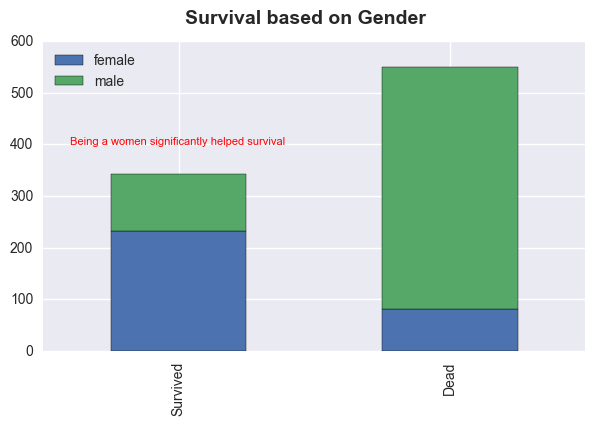

In [12]:
gender_df.plot(kind='bar',stacked=True, figsize=(7,4))
#plt.ylabel('Number of passengers')
plt.suptitle('Survival based on Gender', fontsize=14, fontweight='bold')
plt.text(-.4, 400,'Being a women significantly helped survival', fontsize=8, color='red')
print 'Figure 2.3.1.2'

<b>Summary of Findings </b>
It is evident from looking at the bar charts that being a women significantly increased your chances of survival on the titanic. 

<h3>2.3.2 What relevance does Age have in increasing chance of surviving?</h3>

In [13]:
print 'Average Age:'
titanic_df.Age.mean()

Average Age:


29.69911764705882

In [14]:
print 'Median Age:'
titanic_df.Age.median()

Median Age:


28.0

Figure 2.3.2.1


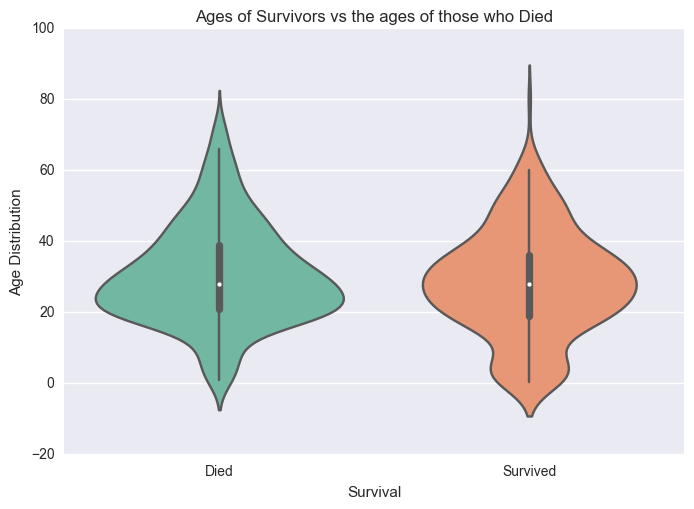

In [15]:
violin_age = sns.violinplot(data = titanic_df, x = 'Survived', y = 'Age',  palette="Set2")


violin_age.set(
                title = 'Ages of Survivors vs the ages of those who Died',
                xticklabels = ['Died','Survived'],
                xlabel = 'Survival',
                ylabel = 'Age Distribution'
            
              );
print 'Figure 2.3.2.1'

In [16]:
# Check the outlier for survived
titanic_df[(titanic_df.Survived ==1) & (titanic_df.Age >65)]

,PassengerId,Name,Survived,Pclass,Sex,Age,Fare,Embarked,embarkment location,Age Group,Passenger Class
630,631,"Barkworth, Mr. Algernon Henry Wilson",1,1,male,80.0,30.0,S,Southampton,Senior,First Class


Figure 2.3.2.2 - Survival by Age & Gender


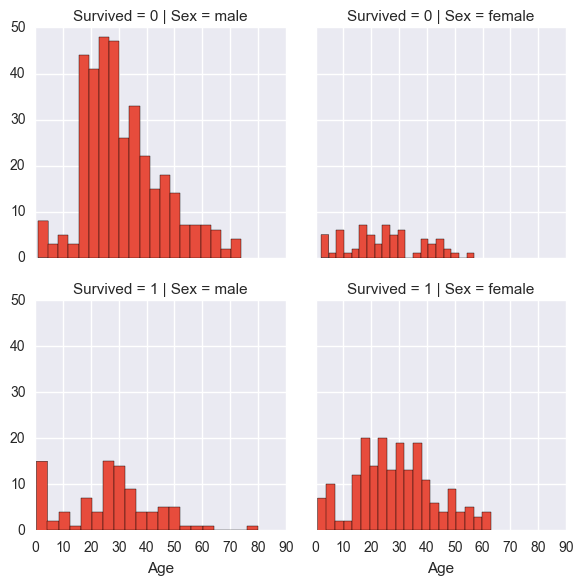

In [17]:
#bins = np.arange(0, 20, 100)
g = sns.FacetGrid(titanic_df, col="Sex",  row="Survived")
g = g.map(plt.hist, "Age", color="#e74c3c", bins = 20)
print 'Figure 2.3.2.2 - Survival by Age & Gender'

In [18]:
# Check the outlier for female children in age group 8 to 13 who didnt survive
titanic_df[ (titanic_df.Sex =='female')& (titanic_df.Age >8)& (titanic_df.Age <13)]

,PassengerId,Name,Survived,Pclass,Sex,Age,Fare,Embarked,embarkment location,Age Group,Passenger Class
147,148,"Ford, Miss. Robina Maggie ""Ruby""",0,3,female,9.0,34.3750,S,Southampton,Child,Third Class
419,420,"Van Impe, Miss. Catharina",0,3,female,10.0,24.1500,S,Southampton,Child,Third Class
541,542,"Andersson, Miss. Ingeborg Constanzia",0,3,female,9.0,31.2750,S,Southampton,Child,Third Class
542,543,"Andersson, Miss. Sigrid Elisabeth",0,3,female,11.0,31.2750,S,Southampton,Child,Third Class
634,635,"Skoog, Miss. Mabel",0,3,female,9.0,27.9000,S,Southampton,Child,Third Class
852,853,"Boulos, Miss. Nourelain",0,3,female,9.0,15.2458,C,Cherbourg,Child,Third Class


<b>Summary of Findings:</b>
<p>From looking at these plots we can see that: </p>
<ul>
<li>The distribution of Age is normal in that the median Age of 28 and mean Age of 29.6 is very similar</li>
<li>The distribution of the Age-Survived is Bi-Modal by the fact that it has two peaks one around 5yrs old and another around 29 years old</li>
<li>Most old people died, however it appears only 1 person >65 years old survived</li>
<li>The ratio of children Aged 0 to 15 that survived is greater than those who didnt, females aged between 9 and 12 however appear to be exception; as can be see in the lower right hand plot found in Figure 2.3.2.2</li>
</ul>

In summary; with exception of females aged between 9 and 12 years old Women and Children stood a greater chance of surviving than men.

Now lets look at how Fare Price, Passenger Class and Embarkment can further increase a women and childs chance of surviving. 

<h3>2.3.3 What relevance does Fare Price have in increasing chance of surviving?</h3>

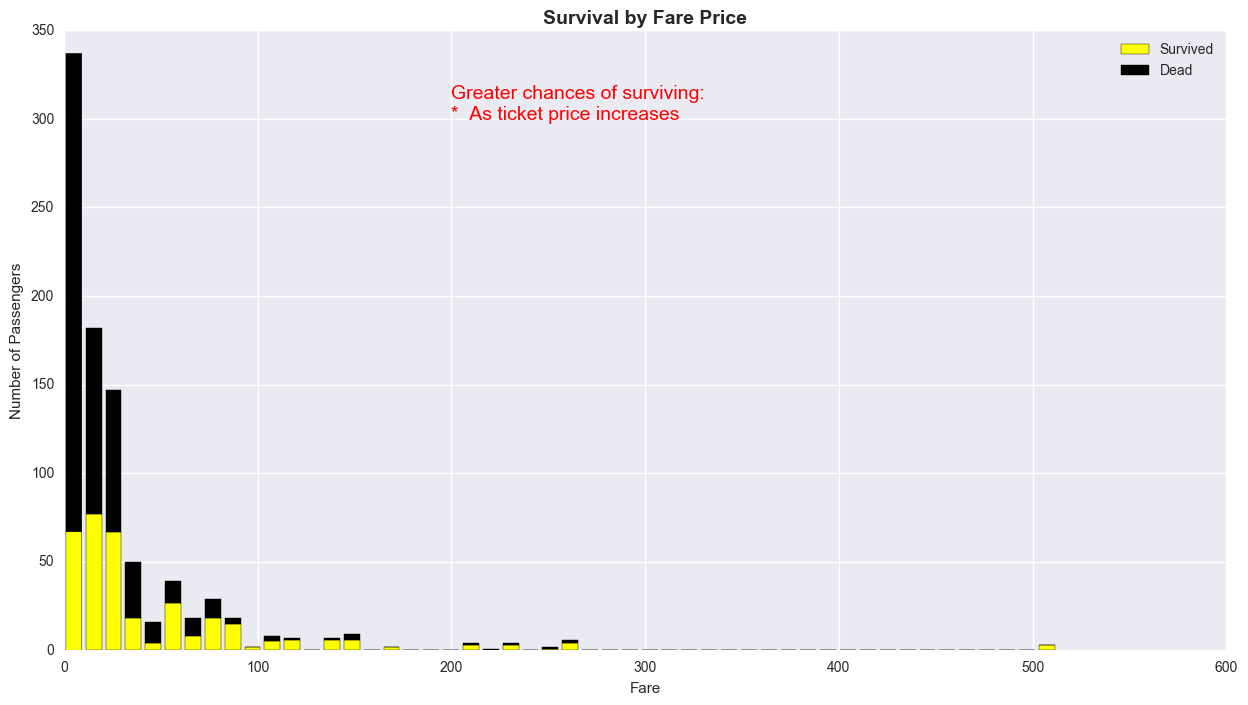

In [26]:
figure = plt.figure(figsize=(15,8))  #15 grids
plt.hist([titanic_df[titanic_df['Survived']==1]['Fare'],
          titanic_df[titanic_df['Survived']==0]['Fare']], 
         stacked=True, 
         color = ['yellow','black'],
         bins = 50,
         label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()
plt.title('Survival by Fare Price', fontsize=14, fontweight='bold')
plt.text(200, 300,'Greater chances of surviving: \n*  As ticket price increases', fontsize=14, color='red')

<b>Summary of Findings:</b>
By looking at the ratio of yellow to black in the stacked bars it appears that as the passengers ticket price increased so did they chances of survival

<b>Interesting Finding: </b>
The ticket price between 40-50 is an exception to the above statement

<H3>2.3.4 What relevance does Passenger class & Fare Price have in increasing chance of surviving?</h3>

Figure 2.3.4.1


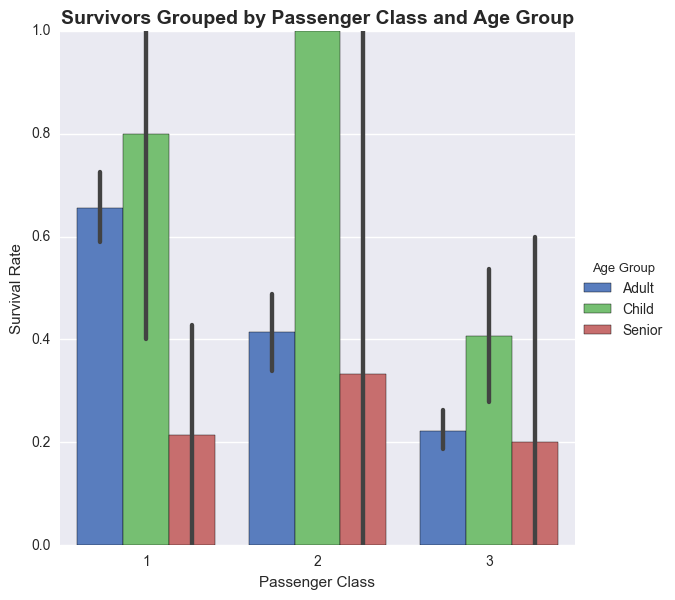

In [27]:

plot = sns.factorplot('Pclass', 'Survived', hue = 'Age Group', data = titanic_df, size=6, kind="bar", palette="muted")
plot.set_axis_labels("Passenger Class", "Survival Rate") 
plt.title('Survivors Grouped by Passenger Class and Age Group', fontsize=14, fontweight='bold')
print 'Figure 2.3.4.1'

Class 2 passenger Children and Seniors stood the greatest chance of surviving of the 3 classes. 

Figure 2.3.4.2


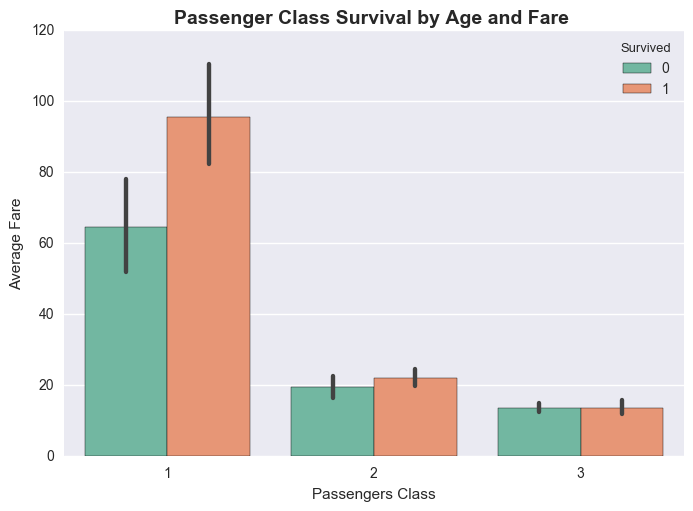

In [28]:
print 'Figure 2.3.4.2'
sns.set(style="darkgrid")
sns.barplot( x="Pclass", y='Fare', hue='Survived', data=titanic_df, estimator=np.mean, palette="Set2" )
plt.title('Passenger Class Survival by Age and Fare ', fontsize=14, fontweight='bold')
plt.ylabel('Average Fare')
plt.xlabel('Passengers Class')
sns.plt.show()


<b>Summary of Findings: </b>
Fare price didnt seem to have a significant relevance for Second and Third Class passengers. However, it did appear significant for 1st Class Passengers. It would be interesting to understand whether the more expensive cabins where located closer to the lifeboats; however the data needed to answer this is absent from the data set.

<h3>2.3.5 So How do things look when Survival Rate for Age and Sex is Grouped by Passenger Class? </h3>

Figure 2.3.5.1 - Survival Rate Age and Sex by Passenger Class


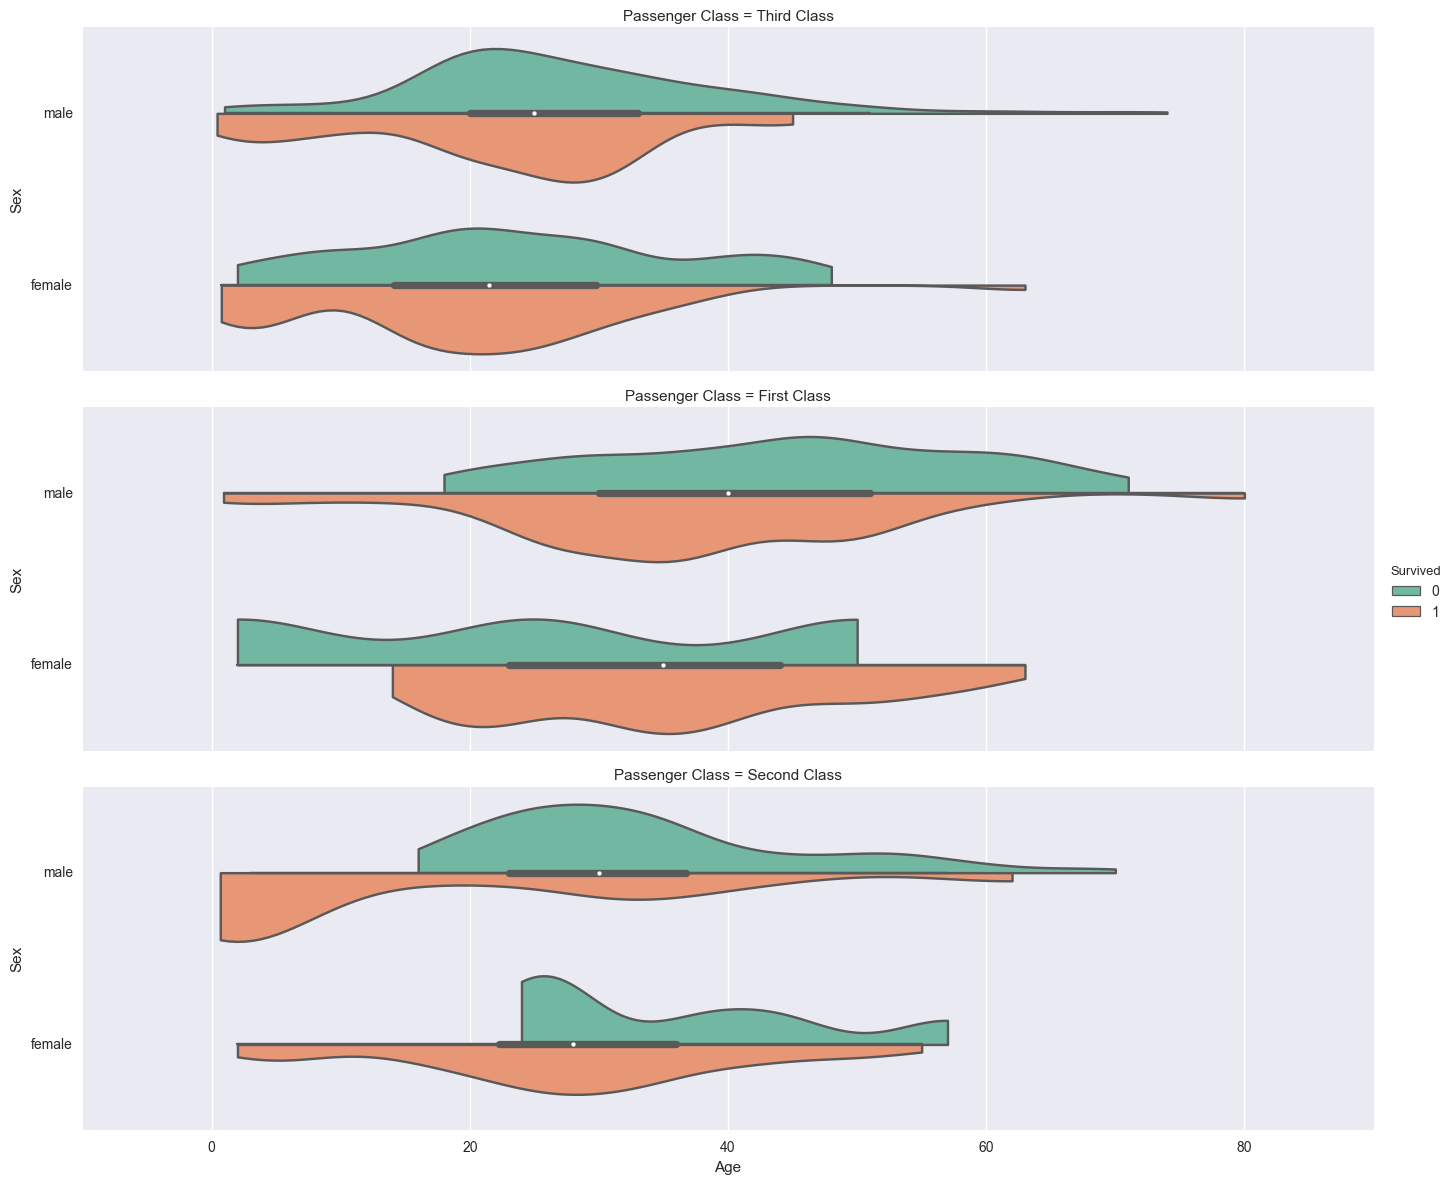

In [29]:
  

plot1 = sns.factorplot('Age','Sex', hue = 'Survived',row = 'Passenger Class',  data = titanic_df, 
                         aspect=3.5, palette="Set2", kind="violin", split=True, cut=0, bw=.3)
(plot1.set_axis_labels("Age", "Sex")

) 
print 'Figure 2.3.5.1 - Survival Rate Age and Sex by Passenger Class'


<b>Summary of Findings from Figure 2.3.5.1 :</b>

<ul>
<li>Each plot shows a very different pattern</li>
<li>Irrespective of Gender and Passenger Class children appear to survive</li>
<li>Irrespective of Gender and Class children survived</li>
<li>Women stood a greater chance of surviving than men across all 3 Passenger Classes</li>
</ul>

<h3>2.3.6 What is the relevance of Embarkment to Age and Survival? </h3>

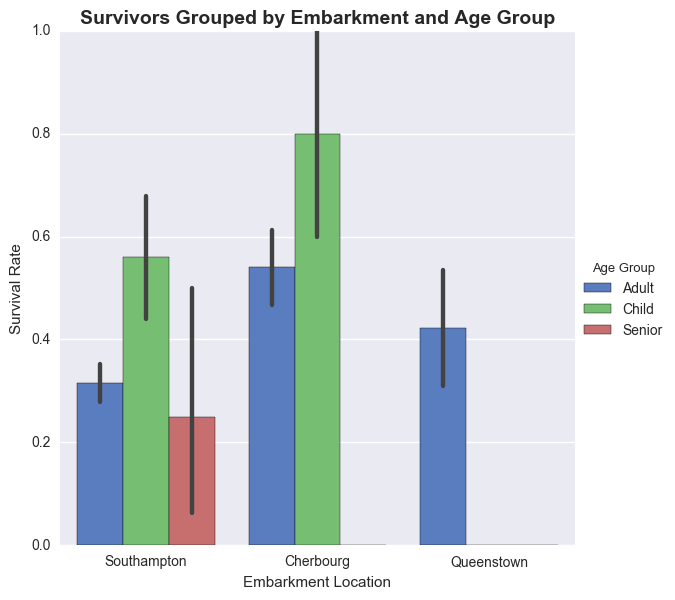

In [30]:
titanic_df['embarkment_loc'] = titanic_df['Embarked'].apply(embarkment_name)    
titanic_df['Age Group'] = titanic_df['Age'].apply(age_group)
plot = sns.factorplot('embarkment_loc', 'Survived', hue = 'Age Group', data = titanic_df, size=6, kind="bar", palette="muted")
plot.set_axis_labels("Embarkment Location", "Survival Rate") 
plt.title('Survivors Grouped by Embarkment and Age Group', fontsize=14, fontweight='bold')

In [31]:
# Check if anyone aged under 15 embarked from Queenstown
titanic_df[(titanic_df.Age <15)& (titanic_df.Embarked=='Q')]

,PassengerId,Name,Survived,Pclass,Sex,Age,Fare,Embarked,embarkment location,Age Group,Passenger Class,embarkment_loc
16,17,"Rice, Master. Eugene",0,3,male,2.0,29.125,Q,Queenstown,Child,Third Class,Queenstown
171,172,"Rice, Master. Arthur",0,3,male,4.0,29.125,Q,Queenstown,Child,Third Class,Queenstown
278,279,"Rice, Master. Eric",0,3,male,7.0,29.125,Q,Queenstown,Child,Third Class,Queenstown
787,788,"Rice, Master. George Hugh",0,3,male,8.0,29.125,Q,Queenstown,Child,Third Class,Queenstown


In [32]:
# Check if anyone aged over 60 embarked from Queenstown or Cherburg
titanic_df[(titanic_df.Age >60)& ((titanic_df.Embarked=='Q')|(titanic_df.Embarked=='C'))]

,PassengerId,Name,Survived,Pclass,Sex,Age,Fare,Embarked,embarkment location,Age Group,Passenger Class,embarkment_loc
54,55,"Ostby, Mr. Engelhart Cornelius",0,1,male,65.0,61.9792,C,Cherbourg,Senior,First Class,Cherbourg
96,97,"Goldschmidt, Mr. George B",0,1,male,71.0,34.6542,C,Cherbourg,Senior,First Class,Cherbourg
116,117,"Connors, Mr. Patrick",0,3,male,70.5,7.7500,Q,Queenstown,Senior,Third Class,Queenstown
280,281,"Duane, Mr. Frank",0,3,male,65.0,7.7500,Q,Queenstown,Senior,Third Class,Queenstown
493,494,"Artagaveytia, Mr. Ramon",0,1,male,71.0,49.5042,C,Cherbourg,Senior,First Class,Cherbourg


<b>Findings:</b>
<li>No children under 15 years of age who embarked in Queenstown Survived</li>
<li>Only Seniors who embarked in Embarked from Southampton Survived</li>


<h2>3.0 Tentative Conclusion</h2>

<ul>
<li>Women stood a greater chance of surviving than men, especially if those women aged under 60 who were higher fare paying Passengers in first class</li>
<li>Being a child increased chance of surviving irrespective of gender and passenger class with exception of:
<ul>
<li> those aged between 8 and 12, for some unknown reason</li>
<li> Those embarked from Southhampton</li>
</ul>
</li> 
</ul>


<b>Confidence Level in the Results:</b>

I am not 100% confident in these results due to the fact that:

<ul>
<li>Performed no statistical analysis</li>
<li>Only had a sample data set to work with</li>
<li>20% of the Age values were missing  </li>
<li>That there are Limitations of my analysis - see section 4.0 below</li>
<li>There is a Survivor bias in that the dataset was collected after the titanic sank and so the data would have been collected only from those that survived.</li>
</ul>

<b>What would give greater confidence in the results</b>

If I had a full reliable data set and had the relevant statistical knowledge...something I hope to develop as this course progresses ;) my confidence levels in the results would be significantly improved. But I'd only ever be 100% certain of my correlations if I was to perfom a causation study which is not feasible to do. 

<H2>3.0 Limitations of the Analysis</H2>
<ul>
<li>Correlation does not imply causation. The above conclusion are based on a sample data set. To get real causation would requre a controlled experiment </li>
<li>There is no mention of crew in the data set; unless they were hidden in the 1st, 2nd or 3rd Class data and if they were it would have distorted the results</li>
<li>Missing 20% of age values would have misrepresent some of the age related visualisations. </li>
<li>There is a Survivor bias in that the dataset was collected after the titanic sank and so the data would have been collected only from those that survived.</li>
<li>The Sibilings and partner values in the data set were not used in my analysis because of the following description that was found in the data discription <i>With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.</i> Using these values may have led me to incorrectly conclude that having family relations would impact your chances of survival. 


Age - 20% is missing
Cabin - 77% is missing
Embarked - 0.3% is missing

</li>
</ul>

<h2>5.0 References</h2>
<ul>
<li>http://seaborn.pydata.org/</li>
<li>http://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type</li>
<li>http://pandas.pydata.org/pandas-docs/version/0.15.2/tutorials.html</li>
<li>Used for ideas on how to structure analysis http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html</li>
<li>http://matplotlib.org/</li>
<li>Video lectures of the course (Intro to Data Analysis)</li>
<li>Kaggle titanic competition page (<a href="https://www.kaggle.com/c/titanic">https://www.kaggle.com/c/titanic</a>)
<li>Use of Seaborn Factorplot http://seaborn.pydata.org/generated/seaborn.factorplot.html?highlight=factorplot </li>
<li>Use of Seaborn Barplot http://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot 
<li>Use of Seaborn Jointplot http://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot </li> 
<li>Seaborn Colour Palettes http://seaborn.pydata.org/tutorial/color_palettes.html?highlight=color%20palette
</li> 
</li>
</ul>
